In [24]:
import cv2
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import matplotlib.pyplot as plt

In [31]:


def show_web_scraping(url):
    print("Web Scraping...")

    if url:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check for HTTP errors
            soup = BeautifulSoup(response.content, 'html.parser')
            # Display Webpage Title
            title = soup.title.string if soup.title else "No title found."
            print(f"Webpage Title: {title}")
            # Get the base URL to resolve relative image URLs
            base_url = "{0.scheme}://{0.netloc}".format(requests.utils.urlparse(url))
            
            # Find all image tags
            images = soup.find_all('img', src=True)
            
            if images:
                # Prepare a list to store image data
                img_data = []
                
                # Extract the first 5 image URLs and load them
                for idx, img in enumerate(images[:5], start=1):
                    img_src = img['src']
                    # Resolve relative URLs
                    img_url = urljoin(base_url, img_src)

                    # Download the image content
                    img_response = requests.get(img_url)
                    img_array = np.asarray(bytearray(img_response.content), dtype=np.uint8)

                    # Convert the image array to a format OpenCV can work with
                    img_cv = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

                    # Convert BGR to RGB for matplotlib
                    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
                    img_data.append(img_rgb)

                # Display images using Matplotlib subplots
                fig, axes = plt.subplots(1, 5, figsize=(20, 4))
                for ax, img, idx in zip(axes, img_data, range(1, 6)):
                    ax.imshow(img)
                    ax.axis('off')  # Turn off the axis
                    ax.set_title(f'Image {idx}')
                
                plt.tight_layout()
                plt.show()
            else:
                print("No images found on this webpage.")
        
        except requests.exceptions.RequestException as e:
            print(f"Error fetching the URL: {e}")



Web Scraping...
Webpage Title: Spotify - Web Player: Music for everyone


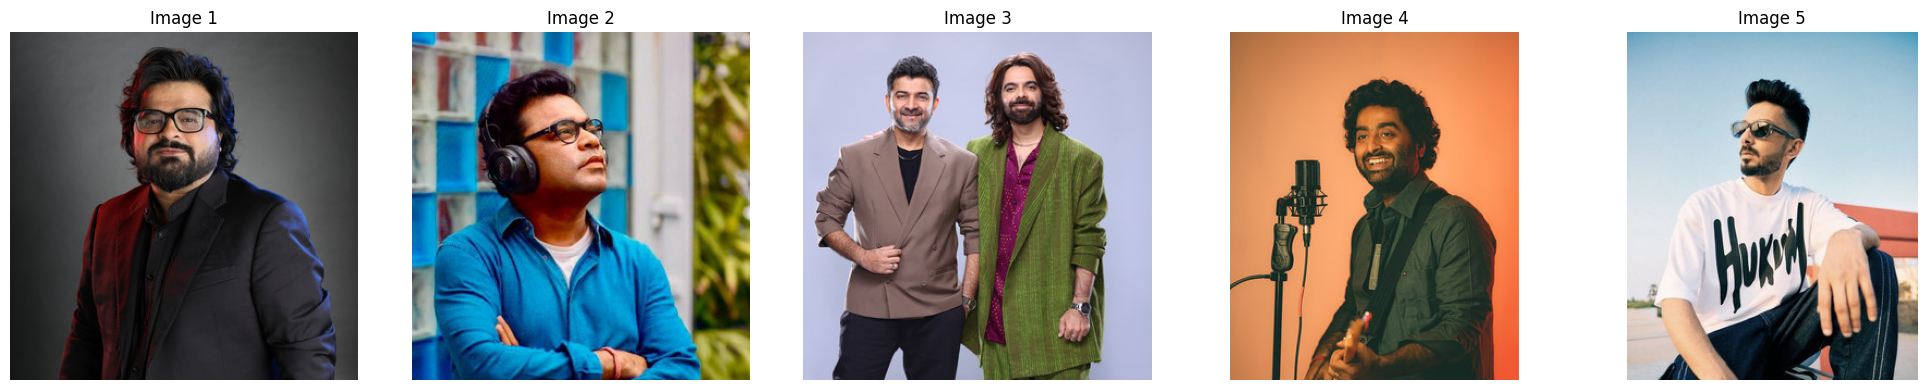

In [32]:
def main():
    url="http://www.spotify.com"
    show_web_scraping(url)
if __name__ == "__main__":
    main()